# Random Slither.io

In [1]:
import universe, gym
import numpy as np
import tensorflow as tf

### Load the environment

In [2]:
env = gym.make('internet.SlitherIO-v0')

[2017-05-06 09:49:41,057] Making new env: internet.SlitherIO-v0


In [3]:
# The SlitherIO environment doesn't contain useful sampling of its action
# space. Probably because it's still new.
screen_xrange = (18,522)
screen_yrange = (84,386)
screen_shape = (screen_yrange[1]-screen_yrange[0], screen_xrange[1]-screen_xrange[0])
pixels_shape = (screen_shape[0], screen_shape[1], 3) # color
print (pixels_shape)

(302, 504, 3)


In [4]:
def sample_screen_pos():
    '''Sample an (x,y) point from the playable game window.'''
    return (np.random.randint(*screen_xrange),
            np.random.randint(*screen_yrange))
def sample_action():
    '''Sample an action ready to send to the environment.

    All Slither actions are mouse actions, either a mouse point or a
    primary-button mouse click.
    '''
    point = sample_screen_pos()
    clicking = (np.random.rand() < 0.3)
    return universe.spaces.vnc_action_space.vnc_event.PointerEvent(x=point[0],
                                                                   y=point[1],
                                                                   buttonmask=clicking)
print(sample_action())

PointerEvent<x=458 y=165 buttonmask=False>


In [5]:
s = env.reset()

[2017-05-06 09:49:42,413] Called reset on <Timer<Render<ThrottleVNCEnv<internet.SlitherIO-v0>>>> before configuring. Configuring automatically with default arguments
[2017-05-06 09:49:42,414] Writing logs to file: /tmp/universe-65165.log
[2017-05-06 09:49:42,782] Ports used: dict_keys([])
[2017-05-06 09:49:42,783] [0] Creating container: image=quay.io/openai/universe.flashgames:0.20.28. Run the same thing by hand as: docker run -p 5900:5900 -p 15900:15900 --privileged --ipc host --cap-add SYS_ADMIN quay.io/openai/universe.flashgames:0.20.28
[2017-05-06 09:49:43,347] Remote closed: address=localhost:5900
[2017-05-06 09:49:43,350] Remote closed: address=localhost:15900
[2017-05-06 09:49:43,353] At least one sockets was closed by the remote. Sleeping 1s...


universe-StSNcr-0 | Setting VNC and rewarder password: openai
universe-StSNcr-0 | [Sat May  6 14:49:43 UTC 2017] Waiting for /tmp/.X11-unix/X0 to be created (try 1/10)
universe-StSNcr-0 | [Sat May  6 14:49:43 UTC 2017] [/usr/local/bin/sudoable-env-setup] Disabling outbound network traffic for none
universe-StSNcr-0 | [init] [2017-05-06 14:49:43,582] Launching system_diagnostics_logger.py, recorder_logdir=/tmp/demo
universe-StSNcr-0 | [init] [2017-05-06 14:49:43,583] Launching reward_recorder.py, recorder_logdir=/tmp/demo
universe-StSNcr-0 | [init] [2017-05-06 14:49:43,587] Launching vnc_recorder.py, recorder_logdir=/tmp/demo
universe-StSNcr-0 | [tigervnc] 
universe-StSNcr-0 | [tigervnc] Xvnc TigerVNC 1.7.0 - built Sep  8 2016 10:39:22
universe-StSNcr-0 | [tigervnc] Copyright (C) 1999-2016 TigerVNC Team and many others (see README.txt)
universe-StSNcr-0 | [tigervnc] See http://www.tigervnc.org for information on TigerVNC.
universe-StSNcr-0 | [tigervnc] Underlying X server release 114000

[2017-05-06 09:49:44,355] Remote closed: address=localhost:5900
[2017-05-06 09:49:44,357] Remote closed: address=localhost:15900
[2017-05-06 09:49:44,360] At least one sockets was closed by the remote. Sleeping 1s...


universe-StSNcr-0 | [tigervnc] 
universe-StSNcr-0 | [tigervnc] Sat May  6 14:49:44 2017
universe-StSNcr-0 | [tigervnc]  Connections: accepted: 172.17.0.1::52826
universe-StSNcr-0 | [nginx] 2017/05/06 14:49:44 [error] 62#62: *1 connect() failed (111: Connection refused) while connecting to upstream, client: 172.17.0.1, server: , request: "GET / HTTP/1.1", upstream: "http://127.0.0.1:15901/", host: "127.0.0.1:10003"
universe-StSNcr-0 | [nginx] 172.17.0.1 - openai [06/May/2017:14:49:44 +0000] "GET / HTTP/1.1" 502 182 "-" "-"
universe-StSNcr-0 | [reward_recorder] [2017-05-06 14:49:44,481] Listening on 0.0.0.0:15898
universe-StSNcr-0 | [vnc_recorder] [2017-05-06 14:49:44,482] Listening on 0.0.0.0:5899
universe-StSNcr-0 | [init] [2017-05-06 14:49:44,536] init detected end of child process 16 with exit code 0, not killed by signal
universe-StSNcr-0 | [2017-05-06 14:49:44,669] [INFO:root] Starting play_controlplane.py with the following: command=['/app/universe-envs/controlplane/bin/controlpla

[2017-05-06 09:49:45,362] Using the golang VNC implementation
[2017-05-06 09:49:45,363] Using VNCSession arguments: {'fine_quality_level': 50, 'encoding': 'tight', 'start_timeout': 7, 'subsample_level': 2}. (Customize by running "env.configure(vnc_kwargs={...})"


universe-StSNcr-0 | [nginx] 2017/05/06 14:49:45 [info] 62#62: *1 client 172.17.0.1 closed keepalive connection
universe-StSNcr-0 | [tigervnc] 
universe-StSNcr-0 | [tigervnc] Sat May  6 14:49:45 2017
universe-StSNcr-0 | [tigervnc]  Connections: closed: 172.17.0.1::52826 (Clean disconnection)


[2017-05-06 09:49:45,371] [0] Connecting to environment: vnc://localhost:5900 password=openai. If desired, you can manually connect a VNC viewer, such as TurboVNC. Most environments provide a convenient in-browser VNC client: http://localhost:15900/viewer/?password=openai


universe-StSNcr-0 | [tigervnc]  EncodeManager: Framebuffer updates: 0
universe-StSNcr-0 | [tigervnc]  EncodeManager:   Total: 0 rects, 0 pixels
universe-StSNcr-0 | [tigervnc]  EncodeManager:          0 B (1:-nan ratio)
universe-StSNcr-0 | [tigervnc]  Connections: accepted: 172.17.0.1::52838
universe-StSNcr-0 | [tigervnc]  SConnection: Client needs protocol version 3.8
universe-StSNcr-0 | [tigervnc]  SConnection: Client requests security type VncAuth(2)
universe-StSNcr-0 | [tigervnc]  VNCSConnST:  Server default pixel format depth 24 (32bpp) little-endian rgb888
universe-StSNcr-0 | [tigervnc]  VNCSConnST:  Client pixel format depth 24 (32bpp) little-endian bgr888
universe-StSNcr-0 | [2017-05-06 14:49:45,402] [INFO:universe.rewarder.remote] Client connecting: peer=tcp4:127.0.0.1:53420 observer=False
universe-StSNcr-0 | [2017-05-06 14:49:45,402] [INFO:universe.rewarder.remote] WebSocket connection established
universe-StSNcr-0 | [nginx] 2017/05/06 14:49:46 [info] 62#62: *5 client sent inv

[2017-05-06 09:49:59,774] [0:localhost:5900] Sending reset for env_id=internet.SlitherIO-v0 fps=60 episode_id=0


universe-StSNcr-0 | [2017-05-06 14:49:59,776] [INFO:universe.rewarder.remote] Received reset message: {'method': 'v0.env.reset', 'body': {'env_id': 'internet.SlitherIO-v0', 'fps': 60, 'seed': None}, 'headers': {'episode_id': '0', 'sent_at': 1494082199.775457, 'message_id': 10}}
universe-StSNcr-0 | [2017-05-06 14:49:59,784] [INFO:root] [EnvStatus] Changing env_state: running (env_id=None) -> resetting (env_id=internet.SlitherIO-v0) (episode_id: 1->2, fps=60)
universe-StSNcr-0 | [2017-05-06 14:49:59,784] [ERROR:root] Closing server (via subprocess.close()) and all chromes (via pkill chromedriver || :; pkill chrome || :)
universe-StSNcr-0 | [init] [2017-05-06 14:49:59,793] init detected end of child process 111 with exit code 0, killed by SIGTERM: 15
universe-StSNcr-0 | [2017-05-06 14:49:59,794] [INFO:root] [Rewarder] Blocking until env finishes resetting
universe-StSNcr-0 | [init] [2017-05-06 14:49:59,803] init detected end of child process 332 with exit code 0, killed by SIGTERM: 15
uni

In [ ]:
def til_screen_not_none():
    s1 = [None]
    while s1[0] is None:
        a = sample_action()
        #a.x=a.y=0.2
        s1,r,d,v = env.step([[a]])
        import time
        time.sleep(1) # we're just waiting for it to be ready...
    return s1[0]['vision'][screen_yrange[0]:screen_yrange[1], screen_xrange[0]:screen_xrange[1]]

s1 = til_screen_not_none()
s1

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
def showarray(a):
    plt.imshow(a)

In [26]:
s1 = til_screen_not_none()

[2017-05-06 09:31:11,389] Throttle fell behind by 1.01s; lost 60.74 frames


universe-Lr0i4K-0 | [2017-05-06 14:31:12,305] [INFO:gym_controlplane.registration] Loaded scorer: <gym_controlplane.reward.score.OCRScorerV0 object at 0x7ff9b5466320>
universe-Lr0i4K-0 | [2017-05-06 14:31:12,500] [INFO:gym_controlplane.registration] Created reward parser for internet.SlitherIO-v0: Reward<scorer=<gym_controlplane.reward.score.OCRScorerV0 object at 0x7ff9b5466320> vexpect=VExpect<{'ready2': <gym_controlplane.integration.transition.ClickTransition object at 0x7ff98159b0b8>, 'ready1': <gym_controlplane.integration.transition.ClickTransition object at 0x7ff98159b400>, 'ready0': <gym_controlplane.integration.transition.ClickTransition object at 0x7ff98159b438>}>>
universe-Lr0i4K-0 | [2017-05-06 14:31:12,501] [INFO:root] Using metadata_encoding={'type': 'qrcode', 'x': 914, 'width': 100, 'y': 658, 'height': 100} probe_key=96 subscription=[(79, 25, 482, 25), (47, 25, 481, 25), (96, 25, 480, 25), (62, 100, 730, 18), (914, 100, 658, 100)]
universe-Lr0i4K-0 | [2017-05-06 14:31:12,

In [27]:
input_pixels = tf.placeholder(tf.uint8, shape=pixels_shape, name='input_pixs')
bw_pixels = tf.image.convert_image_dtype(tf.image.rgb_to_grayscale(input_pixels), dtype=tf.float32)
def make_conv(input_img, filter_tensor, stride):
    layer1 = tf.nn.conv2d([input_img], filter_tensor, stride, padding="VALID")
    return layer1

In [28]:
sess = tf.Session()

In [29]:
init_op = tf.global_variables_initializer()
# Run the 'init' op
sess.run(init_op)

universe-Lr0i4K-0 | [2017-05-06 14:31:20,581] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.11s, sent 1 reward messages to agent: reward=1.0 reward_min=1.0 reward_max=1.0 done=False info={'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.pixels': 8654, 'rewarder.vnc.updates.bytes': 1195}
universe-FhmAxq-0 | [2017-05-06 14:31:20,601] [INFO:universe.rewarder.remote] [Rewarder] Over past 2.13s, sent 1 reward messages to agent: reward=1.0 reward_min=1.0 reward_max=1.0 done=False info={'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.bytes': 1294, 'rewarder.vnc.updates.n': 1}


In [30]:
s1 = til_screen_not_none()

[2017-05-06 09:31:20,703] Throttle fell behind by 9.29s; lost 557.69 frames


0.996078 0.996078
universe-Lr0i4K-0 | [2017-05-06 14:31:21,940] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.36s, sent 1 reward messages to agent: reward=3.0 reward_min=3.0 reward_max=3.0 done=False info={'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.bytes': 1294}
universe-FhmAxq-0 | [2017-05-06 14:31:22,055] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.45s, sent 2 reward messages to agent: reward=4.0 reward_min=2.0 reward_max=2.0 done=False info={'rewarder.vnc.updates.pixels': 1368, 'rewarder.vnc.updates.bytes': 4124, 'rewarder.vnc.updates.n': 1}


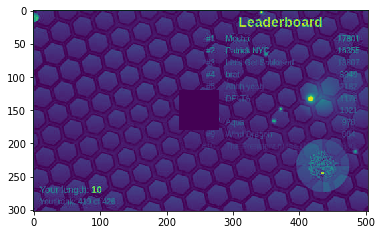

In [31]:
def hide_spots(img):
    hidden_spots = img
    hidden_spots[120:180,220:280] = 0.0  # Hide the worm
    #hidden_spots[195:275,395:475] = 0.0  # Hide the map
    return hidden_spots

hidden_spots = hide_spots(s1)
bw = sess.run(bw_pixels, feed_dict={input_pixels:hidden_spots})
print(bw.max(), bw.max())
showarray(bw.reshape(hidden_spots.shape[:-1]))

In [32]:
def test_filter_and_stride(s1, input_img, filters, filter_, stride_):
    filter_ = filter_/np.linalg.norm(filter_)
    filter_tensor = tf.placeholder(tf.float32, shape=filter_.shape, name='filter1')
    new_filters = {**filters, **{filter_tensor:filter_}}
    l1 = make_conv(input_img,filter_tensor,stride_)
    l1 = l1[0]
    img_for_disp = sess.run(l1, feed_dict={**new_filters, **{input_pixels:s1}})
    img_for_disp = img_for_disp.reshape(img_for_disp.shape[:-1])
    showarray(img_for_disp)
    print (img_for_disp.shape)
    return l1,img_for_disp,new_filters

(100, 168)
universe-Lr0i4K-0 | [2017-05-06 14:31:22,522] [INFO:universe.wrappers.logger] Stats for the past 5.01s: vnc_updates_ps=5.8 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=7934.9 vnc_pixels_ps[total]=44878.3 reward_lag=None rewarder_message_lag=None fps=59.54
universe-Lr0i4K-0 | [2017-05-06 14:31:22,556] [INFO:universe.pyprofile] [pyprofile] period=5.01s timers={"rewarder.sleep.missed": {"mean": "10.03ms", "calls": 4, "std": "8.99ms"}, "score.crop_cache.get.OCRScorerV0": {"mean": "144.05us", "calls": 27, "std": "74.95us"}, "score.crop_cache.get.MatchImage": {"mean": "264.72us", "calls": 81, "std": "1.59ms"}, "rewarder.compute_reward": {"mean": "904.70us", "calls": 298, "std": "3.12ms"}, "rewarder.frame": {"mean": "17.52ms", "calls": 298, "std": "1.97ms"}, "reward.parsing.gameover": {"mean": "970.59us", "calls": 27, "std": "2.83ms"}, "rewarder.sleep": {"mean": "15.22ms", "calls": 294, "std": "1.55ms"}, "score.crop_

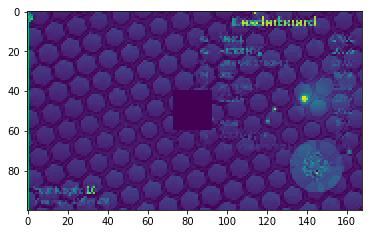

In [33]:
outline_filter = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0,],
])[:,:,np.newaxis,np.newaxis]
strides = [1,3,3,1]

filters = {}
l1,l1_disp, filters = test_filter_and_stride(s1, bw_pixels, filters, outline_filter, strides)

(32, 55)


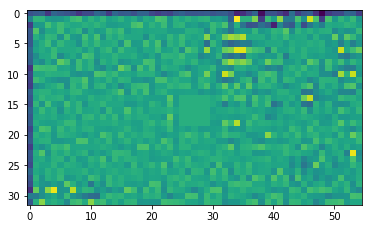

In [34]:
food_feature_kernel = np.array([
    [-8, -8, -8, -8, -8],
    [-8,  4,  16,  4, -8],
    [-8,  16, 32,  16, -8],
    [-8,  4,  16,  4, -8],
    [-8, -8, -8, -8, -8],
])[:,:,np.newaxis,np.newaxis]

strides = [1,3,3,1]
food_feature,_, filters = test_filter_and_stride(s1, l1, filters, food_feature_kernel, strides)

universe-Lr0i4K-0 | [2017-05-06 14:31:23,010] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.07s, sent 2 reward messages to agent: reward=1.0 reward_min=0 reward_max=1.0 done=False info={'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.pixels': 9600, 'rewarder.profile': '<2035 bytes>', 'rewarder.vnc.updates.bytes': 1294}
(32, 55)


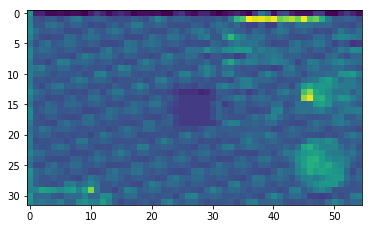

In [35]:
snake_feature_kernel = -np.array([
    [ 8,  8,  8,  8,  8],
    [-8, -8, -8, -8, -8],
    [-8, -8, -8, -8, -8],
    [-8, -8, -8, -8, -8],
    [-8, -8, -8, -8, -8],
])[:,:,np.newaxis,np.newaxis]
strides = [1,3,3,1]
snake_feature,snake_img, filters = test_filter_and_stride(s1, l1, filters, snake_feature_kernel, strides)

[2017-05-06 09:31:23,428] Killing and removing container: id=3ac71d01559acc4623574daae3f6413f2c9b2ccb6daf5f383c56fef3b306a52b


universe-FhmAxq-0 | [2017-05-06 14:31:23,475] [INFO:universe.wrappers.logger] Stats for the past 5.01s: vnc_updates_ps=6.2 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=10004.8 vnc_pixels_ps[total]=44465.4 reward_lag=None rewarder_message_lag=None fps=59.69
universe-FhmAxq-0 | [2017-05-06 14:31:23,482] [INFO:universe.pyprofile] [pyprofile] period=5.01s timers={"score.crop_cache.readthrough.OCRScorerV0": {"std": "4.08ms", "calls": 5, "mean": "19.72ms"}, "reward.parsing.gameover": {"std": "492.58us", "calls": 31, "mean": "448.33us"}, "rewarder.sleep": {"std": "1.86ms", "calls": 294, "mean": "14.95ms"}, "rewarder.frame": {"std": "1.71ms", "calls": 299, "mean": "17.65ms"}, "vnc_env.VNCEnv.vnc_session.step": {"std": "624.90us", "calls": 299, "mean": "259.25us"}, "rewarder.sleep.missed": {"std": "4.11ms", "calls": 5, "mean": "5.28ms"}, "score.crop_cache.get.MatchImage": {"std": "257.13us", "calls": 93, "mean": "95.29us"}, "scor

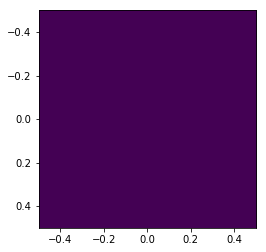

In [36]:
def make_fully_connected_decaying_pull(feature_map, filters):
    width = int(feature_map.get_shape()[1])
    height= int(feature_map.get_shape()[0])
    half_width=int(height/2)
    half_height=int(height/2)
    row_multiplier = [1./((i-half_width)**3) if i != half_width else 0 for i in range(0, width)]
    feature_pull_x = np.asarray([row_multiplier]*height)[:,:,np.newaxis,np.newaxis]

    strides = [1,1,1,1]
    mov_x,_, filters = test_filter_and_stride(s1, feature_map, filters, feature_pull_x, strides)

    col_multiplier = [1./((i-half_height)**3) if i != half_height else 0 for i in range(0, height)]
    feature_pull_y = np.asarray([col_multiplier]*width).T[:,:,np.newaxis,np.newaxis]

    mov_y,_, filters = test_filter_and_stride(s1, feature_map, filters, feature_pull_y, strides)

    return mov_x, mov_y, filters
snake_x,snake_y, filters = make_fully_connected_decaying_pull(snake_feature, filters)
food_x,food_y, filters = make_fully_connected_decaying_pull(food_feature, filters)

In [37]:
output_mouse_pos_x,output_mouse_pos_y = snake_x*food_x, snake_y*food_y

universe-FhmAxq-0 | [2017-05-06 14:31:24,491] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.01s, sent 2 reward messages to agent: reward=5.0 reward_min=2.0 reward_max=3.0 done=False info={'rewarder.vnc.updates.pixels': 9928, 'rewarder.vnc.updates.bytes': 1396, 'rewarder.vnc.updates.n': 1}
universe-Lr0i4K-0 | [2017-05-06 14:31:24,534] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.52s, sent 1 reward messages to agent: reward=2.0 reward_min=2.0 reward_max=2.0 done=False info={'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.pixels': 8320, 'rewarder.vnc.updates.bytes': 1145}


In [38]:
sess.run((output_mouse_pos_x, output_mouse_pos_y), feed_dict={**filters, **{input_pixels:s1}})

(array([[[-0.00137938]]], dtype=float32),
 array([[[-0.03019257]]], dtype=float32))

In [7]:
while True:
    #s1 = til_screen_not_none()
    #[x],[y] = sess.run((output_mouse_pos_x, output_mouse_pos_y), feed_dict={**filters, **{input_pixels:s1}})
    a = sample_action()
    #a.x,a.y = x*25500,y*25500 
    #a.x,a.y = 0.4,0.4
    print('executing action: ',a)
    s1,r,d,v = env.step([[a]])
    print(r, d)
    import time
    time.sleep(1) # Send an action every .5 seconds


[2017-05-06 09:50:43,300] Throttle fell behind by 2.74s; lost 164.23 frames


executing action:  PointerEvent<x=300 y=109 buttonmask=False>
[0.0] [False]
universe-StSNcr-0 | 2017/05/06 14:50:43 I0506 14:50:43.547997 57 gymvnc.go:374] [0:127.0.0.1:5900] update queue max of 60 reached; pausing further updates
executing action:  PointerEvent<x=315 y=266 buttonmask=False>
[0.0] [False]
executing action:  PointerEvent<x=276 y=299 buttonmask=False>
[0.0] [False]
executing action:  PointerEvent<x=265 y=226 buttonmask=False>
[0.0] [False]
executing action:  PointerEvent<x=446 y=303 buttonmask=False>
[0.0] [False]
executing action:  PointerEvent<x=74 y=278 buttonmask=True>
[0.0] [False]
executing action:  PointerEvent<x=210 y=328 buttonmask=False>
[0.0] [False]
executing action:  PointerEvent<x=446 y=361 buttonmask=False>
[0.0] [False]
executing action:  PointerEvent<x=85 y=367 buttonmask=False>
[0.0] [False]
universe-StSNcr-0 | [2017-05-06 14:50:51,385] [INFO:root] [EnvController] Running command: /app/universe-envs/controlplane/bin/play_vexpect -e internet.SlitherIO-v0

KeyboardInterrupt: 

In [100]:
np.random.rand()

0.6953456333234496